<a href="https://colab.research.google.com/github/sumalatha456/python_list/blob/main/EXCELER_NLP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##SENTIMENT ANALYSIS
AMAZON FINE FOOD REVIEWS



In [1]:
#import necessary libraeries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Reviews.csv', nrows=500)
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      500 non-null    int64 
 1   ProductId               500 non-null    object
 2   UserId                  500 non-null    object
 3   ProfileName             500 non-null    object
 4   HelpfulnessNumerator    500 non-null    int64 
 5   HelpfulnessDenominator  500 non-null    int64 
 6   Score                   500 non-null    int64 
 7   Time                    500 non-null    int64 
 8   Summary                 500 non-null    object
 9   Text                    500 non-null    object
dtypes: int64(5), object(5)
memory usage: 39.2+ KB


In [ ]:
df.Summary.head()

,Summary
0,Good Quality Dog Food
1,Not as Advertised
2,"""Delight"" says it all"
3,Cough Medicine
4,Great taffy


In [ ]:
df.Text.head()

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...


In [ ]:
!pip install stopwords

In [ ]:
!pip install textblob

In [ ]:
import nltk
nltk.download('stopwords')
# Download the 'wordnet' corpus for lemmatization
nltk.download('wordnet') # This line is added to fix the error
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [4]:
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob, Word

# Ensure required NLTK data is available
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize text
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    # Correct spelling
    words = [str(TextBlob(word).correct()) for word in words]
    # Lemmatize words
    words = [Word(word).lemmatize() for word in words]
    return ' '.join(words)

# Create a sample DataFrame
data = {'Text': ['This is a sample sentence.', 'Preprocessing text is useful for NLP tasks.']}
df = pd.DataFrame(data)

# Apply preprocessing to the 'Text' column
df['Text'] = df['Text'].apply(preprocess_text)

# Display the first few rows
print(df['Text'].head())


0                       sample sentence
1    preprocessing text useful nap task
Name: Text, dtype: object


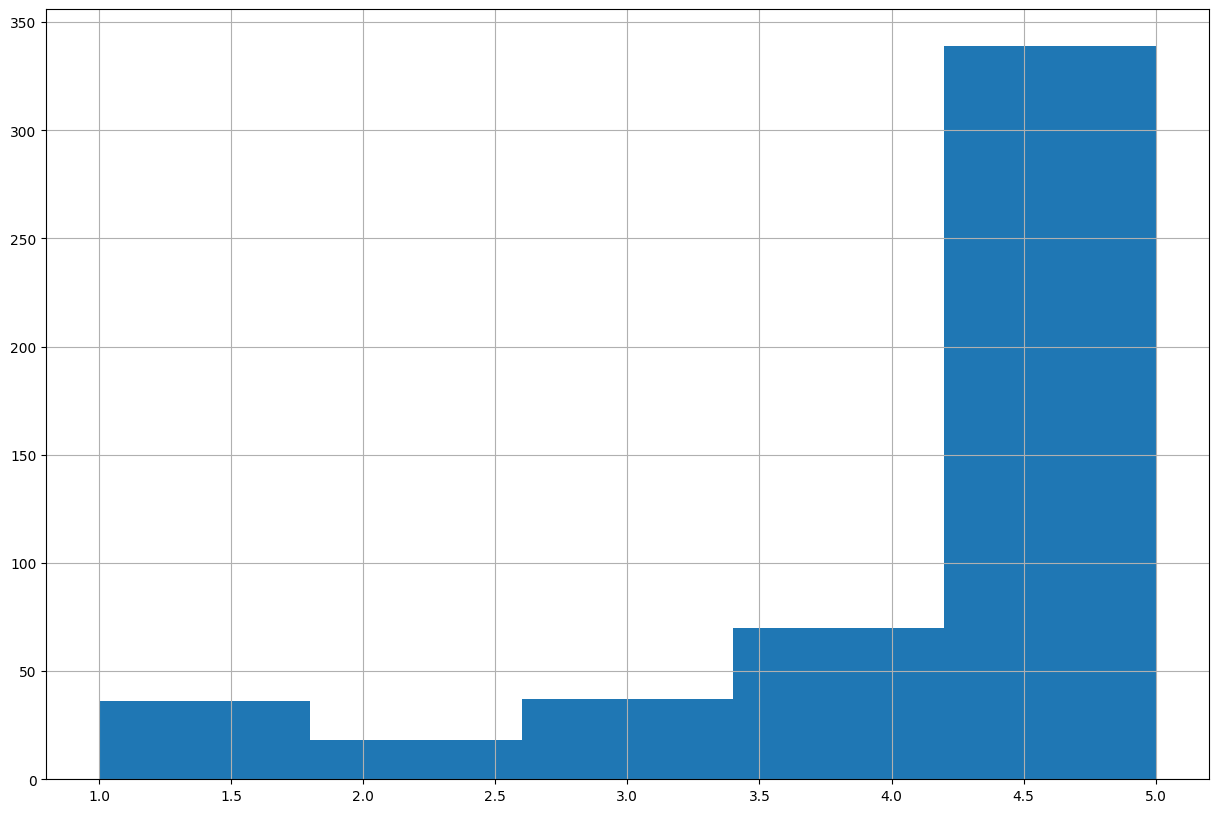

Score
1     36
2     18
3     37
4     70
5    339
dtype: int64


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
# ... (your previous code) ...

# Load the original CSV file
reviews = pd.read_csv('Reviews.csv', nrows=500)
# Preprocess 'Text' column if needed
# reviews['Text'] = reviews['Text'].apply(preprocess_text)

reviews.dropna(inplace=True)

# Create histogram of 'Score' column
reviews.Score.hist(bins=5, figsize=(15, 10))
plt.show()

# Group by 'Score' and display counts
print(reviews.groupby('Score').size())

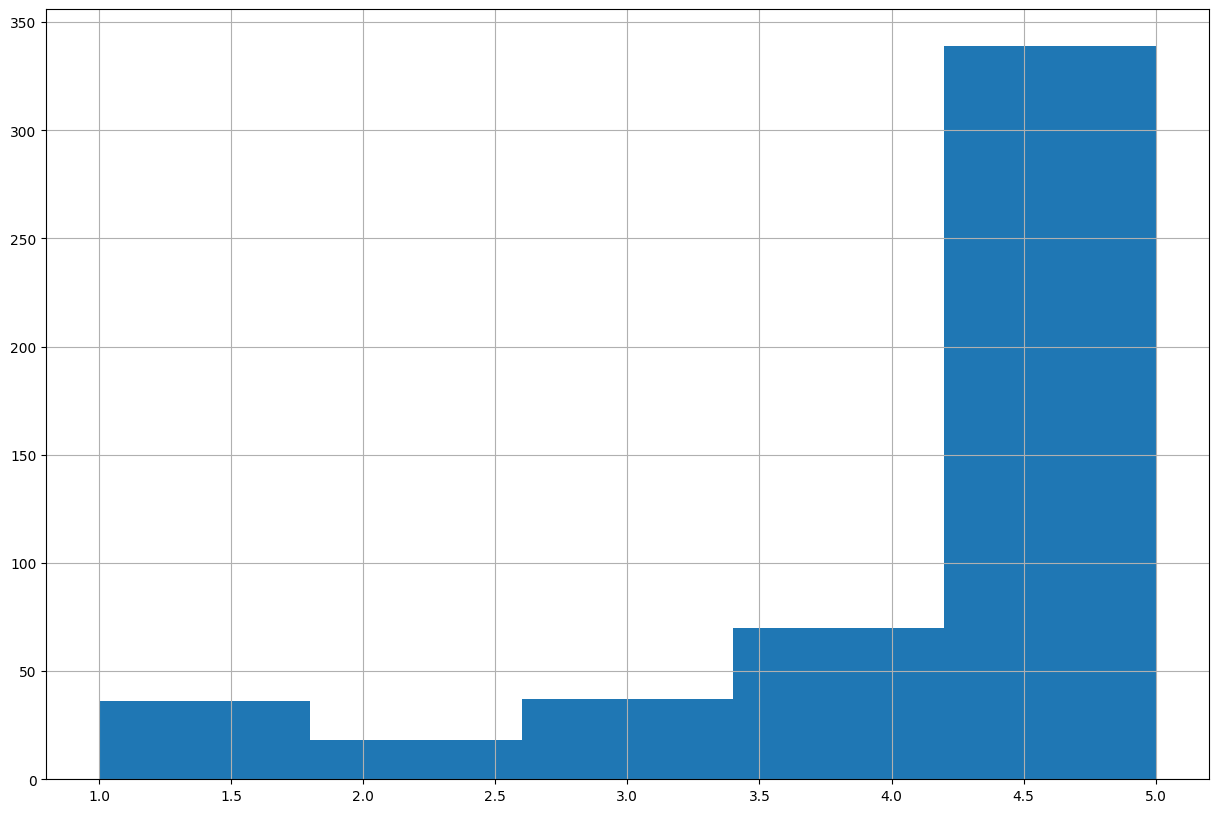

Score
1     36
2     18
3     37
4     70
5    339
dtype: int64


In [18]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the original CSV file to ensure that you have the 'Score' column:
reviews = pd.read_csv('Reviews.csv', nrows=500)

subset_df.dropna(inplace=True)

# Create histogram of 'Score' column
subset_df['Score'].hist(bins=5, figsize=(15, 10))
plt.show()

# Group by 'Score' and display counts
print(subset_df.groupby('Score').size())

# Create subsets based on 'Score'
score_1 = subset_df[subset_df['Score'] == 1].sample(n=18)
score_2 = subset_df[subset_df['Score'] == 2].sample(n=18)
score_3 = subset_df[subset_df['Score'] == 3].sample(n=18)
score_4 = subset_df[subset_df['Score'] == 4].sample(n=18)
score_5 = subset_df[subset_df['Score'] == 5].sample(n=18)

In [20]:
reviews_sample = pd.concat([score_1, score_2, score_3, score_4, score_5], axis=0) # Changed 'axix' to 'axis'
reviews_sample.reset_index(inplace=True)
print(reviews_sample.groupby('Score').count().Id)

Score
1    18
2    18
3    18
4    18
5    18
Name: Id, dtype: int64


In [21]:
!pip install wordcloud

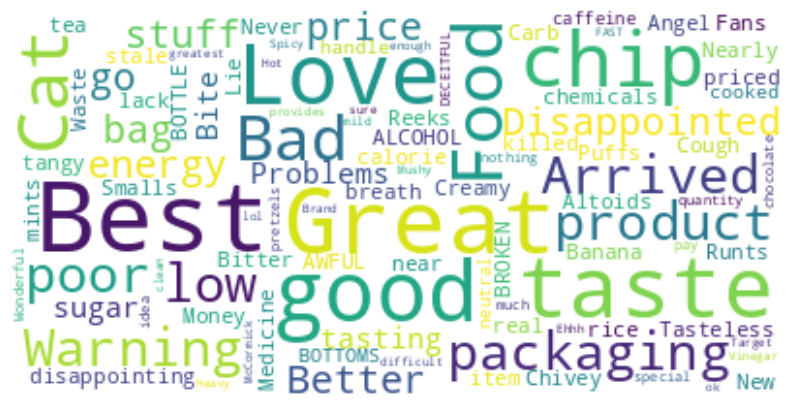

In [22]:
from wordcloud import WordCloud
reviews_str = " ".join(reviews_sample['Summary'].to_numpy())
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
df.Text.head()

,Text
0,sample sentence
1,preprocessing text useful nap task


In [30]:
#Now let's split the data into negative(score is 1 or 2) and positive (4 or #)
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1,2])] # Changed 'reviews_Sample' to 'reviews_sample'
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4,5])] # Changed 'reviews_Sample' to 'reviews_sample'

#Transform to single string
negative_reviews_str = negative_reviews.Text.str.cat()
positive_reviews_str = positive_reviews.Text.str.cat()

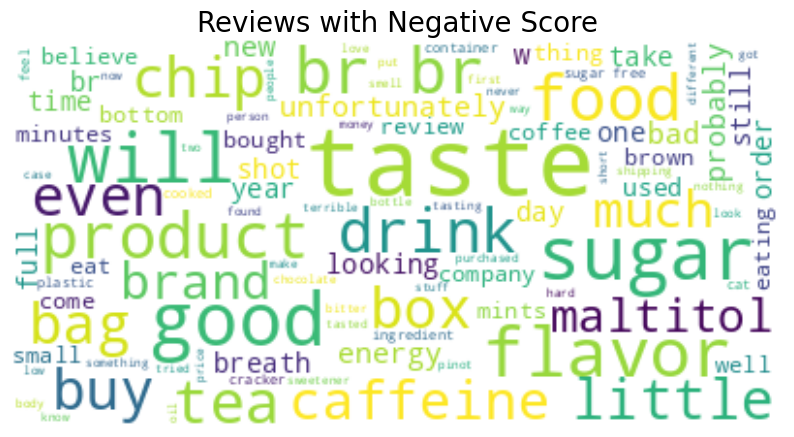

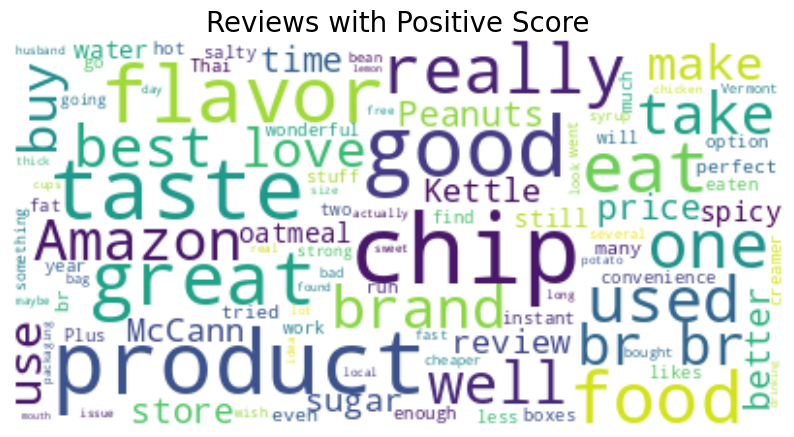

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(negative_reviews_str)
wordcloud2 = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(positive_reviews_str)

# Display the word cloud for negative reviews
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Reviews with Negative Score", fontsize=20)
plt.show()

# Display the word cloud for positive reviews
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.title("Reviews with Positive Score", fontsize=20)
plt.show()


##VADER SENTIMENT ANALYSIS
##VADER (Valence Aware Dictionary and sEntiment Reasoner)


In [32]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


In [33]:
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
plt.style.use('fivethirtyeight')
cp = sns.color_palette()
analyzer = SentimentIntensityAnalyzer()
emptyline=[]
for rows in df['Text']:
  vs = analyzer.polarity_scores(rows)
  emptyline.append(vs)

In [34]:
df_sentiments = pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.0,0.435,0.565,0.0772
1,0.0,0.580,0.420,0.4404
